<a href="https://colab.research.google.com/github/mehmedbilgin/music_recommendation_system/blob/main/music_rec_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yapay Zekaya Giriş Projesi
* Fatih Mehmed Bilgin
* Emir Muhammet Aydemir
* Kadir Kartal


In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 7.7 MB/s eta 0:00:00


**Music Recommendation System**

Lütfen kullanıcının dinlediği şarkıları içeren çalma listesi ID'sini girin: 6eMEYyNV8WEdeMTT8ymHv0
Kullanıcının dinlediği toplam şarkı sayısı: 15
Veri setindeki toplam şarkı sayısı: 67


Öneri Listesi:
1. ('Yaralarını Ben Sarayım', 'Berk Baysal', 'https://i.scdn.co/image/ab67616d0000b27396e65b9a8a7538669a6f5d15')


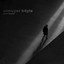


2. ('Her Gece', 'Perdenin Ardındakiler', 'https://i.scdn.co/image/ab67616d0000b27338c4220e4449acf6bf7d1660')


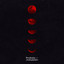


3. ('Olsun', 'Sertab Erener', 'https://i.scdn.co/image/ab67616d0000b273f09a85f3a0e1df7ffb87f898')


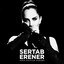


4. ('Garezi Var', 'Kahraman Deniz', 'https://i.scdn.co/image/ab67616d0000b273b73cdfdbf83179759b136606')


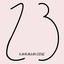


5. ('Sen Benim Şarkılarımsın', 'Cem Adrian', 'https://i.scdn.co/image/ab67616d0000b273ec6a229d39fcaf7afdcf8a3d')


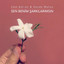


6. ('Anıları Sakla', 'Batuhan Kordel', 'https://i.scdn.co/image/ab67616d0000b2739f7d76800cb82d6af86c02a7')


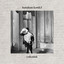


7. ('Hep De Yorgun', 'Yaşlı Amca', 'https://i.scdn.co/image/ab67616d0000b2738594bb0075f45512b208d02d')


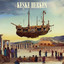


8. ('Nasıl Öğrendin Unutmayı', 'Kolpa', 'https://i.scdn.co/image/ab67616d0000b273fbef8a75691794dd500b4a98')


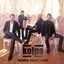


9. ('Geri Dön', 'Sezen Aksu', 'https://i.scdn.co/image/ab67616d0000b2731773d8c5158bab36592b24cb')


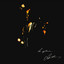


10. ('Ölümle Yaşam Arasında', 'Mavi Gri', 'https://i.scdn.co/image/ab67616d0000b273048726bd779be4ab05863d80')


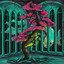

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Spotify API anahtarlarınızı buraya ekleyin   4HHQquxPkx4EUjMHOAYIiM    - 6eMEYyNV8WEdeMTT8ymHv0
client_id = 'bc6f5a71013f4155a0874aebe0100635'
client_secret = '98a1134230354a64ac77120d3572a6bb'

# API kimlik doğrulaması
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Veri setini oluşturma
#playlist_id_dataset = input("Lütfen Spotify veri seti için çalma listesi ID'sini girin: ")
playlist_id_dataset = '4HHQquxPkx4EUjMHOAYIiM'
dataset_playlist = sp.playlist(playlist_id_dataset)
dataset_tracks = dataset_playlist["tracks"]["items"]
dataset_ids = []
dataset_names = []
dataset_artists = []
dataset_images = []
for track in dataset_tracks:
    if track["track"]:
        dataset_ids.append(track["track"]["id"])
        dataset_names.append(track["track"]["name"])
        artist = track["track"]["artists"][0]["name"]
        dataset_artists.append(artist)
        image = track["track"]["album"]["images"][0]["url"]
        dataset_images.append(image)
dataset_features = []
for i in range(0, len(dataset_ids), 50):
    audio_features = sp.audio_features(dataset_ids[i:i+50])
    for track in audio_features:
        dataset_features.append(track)
dataset_df = pd.DataFrame(dataset_features)
dataset_df["name"] = dataset_names
dataset_df["artist"] = dataset_artists
dataset_df["image"] = dataset_images
dataset_df = dataset_df.drop(['analysis_url', 'track_href', 'type', 'uri', 'id'], axis=1)
dataset_df = dataset_df[['name', 'artist', 'image', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
dataset_df.to_csv('spotify_dataset.csv', index=False)

# Kullanıcının dinlediği şarkıları öğrenme
playlist_id_user = input("Lütfen kullanıcının dinlediği şarkıları içeren çalma listesi ID'sini girin: ")
user_playlist = sp.playlist(playlist_id_user)
user_tracks = user_playlist["tracks"]["items"]
user_ids = []
user_names = []
user_artists = []
for track in user_tracks:
    if track["track"]:
        user_ids.append(track["track"]["id"])
        user_names.append(track["track"]["name"])
        artist = track["track"]["artists"][0]["name"]
        user_artists.append(artist)
user_features = []
for i in range(0, len(user_ids), 50):
    audio_features = sp.audio_features(user_ids[i:i+50])
    for track in audio_features:
        user_features.append(track)
user_df = pd.DataFrame(user_features)
user_df["name"] = user_names
user_df["artist"] = user_artists
user_df = user_df.drop(['analysis_url', 'track_href', 'type', 'uri', 'id'], axis=1)
user_df = user_df[['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

# Kullanıcının dinlediği şarkı sayısını gösterme
print("Kullanıcının dinlediği toplam şarkı sayısı:", len(user_df))

# Spotify veri setini yükleme
dataset_df = pd.read_csv('spotify_dataset.csv')
print('Veri setindeki toplam şarkı sayısı:', len(dataset_df))
print()  # boş bir satır ekleme

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X = dataset_df.drop(['name', 'artist', 'image'], axis=1)
X = scaler.fit_transform(X)
user_X = user_df.drop(['name', 'artist'], axis=1)
user_X = scaler.transform(user_X)
print()  # boş bir satır ekleme

# Modeli oluşturma
model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(X)

# Kullanıcının dinlediği tüm şarkıların özelliklerini kullanarak öneri yapma
query = user_X


# En yakın şarkıları bulma
distances, indices = model.kneighbors(query)

# Öneri listesi oluşturma
recommendations = []
for i in indices[0]:
    song = dataset_df.iloc[i]
    recommendations.append((song['name'], song['artist'], song['image']))


# Öneri listesini daha görsel hale getirme
recommendations_with_images = []
for i, rec in enumerate(recommendations):
    # Şarkının kapak resmini alıp, öneri listesine ekleyin
    track_name = dataset_df.iloc[indices[0][i]]['name']
    track_artist = dataset_df.iloc[indices[0][i]]['artist']
    results = sp.search(q=track_name + ' ' + track_artist, type='track', limit=1)
    image_url = results['tracks']['items'][0]['album']['images'][2]['url']  # 300x300 boyutunda olan resmi alıyoruz
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    recommendations_with_images.append((rec, img))

# Öneri listesini gösterme
print("Öneri Listesi:")
for i, rec in enumerate(recommendations_with_images):
    print(str(i + 1) + ".", rec[0])
    display(rec[1])
    print()

Lütfen kullanıcının dinlediği şarkının Spotify linkini girin: 0XNX9BCSWvEwsdBwUTRhMh
Kullanıcının dinlediği toplam şarkı sayısı: 1
Veri setindeki toplam şarkı sayısı: 67


Öneri Listesi:
1. ('Kor', 'Emir Can İğrek', 'https://i.scdn.co/image/ab67616d0000b2737efcf250caa96ed05bdfe701')


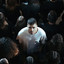


2. ('Sen Benim Şarkılarımsın', 'Cem Adrian', 'https://i.scdn.co/image/ab67616d0000b273ec6a229d39fcaf7afdcf8a3d')


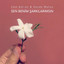


3. ('Anıları Sakla', 'Batuhan Kordel', 'https://i.scdn.co/image/ab67616d0000b2739f7d76800cb82d6af86c02a7')


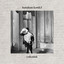


4. ('Aşkın Olayım', 'Simge', 'https://i.scdn.co/image/ab67616d0000b2738ffe0967a3b236d34428b19a')


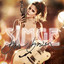


5. ('NKBİ', 'Güneş', 'https://i.scdn.co/image/ab67616d0000b273393978b8aaa965132c152510')


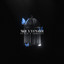


6. ('Another Love x Set Fire - Remix', 'Leopanforte', 'https://i.scdn.co/image/ab67616d0000b273c6ea184cb44d5100174a6479')


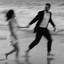


7. ('Geceyi Anlatmış', 'Ozbi', 'https://i.scdn.co/image/ab67616d0000b27339a88dd2dcaace7efccba270')


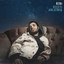


8. ('Haydi Söyle', 'Kalben', 'https://i.scdn.co/image/ab67616d0000b273e0606d2814f3b2a77be19a45')


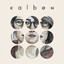


9. ('Shawty', 'Shawty', 'https://i.scdn.co/image/ab67616d0000b2738f931415330ba6cdd45e8ca6')


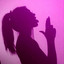


10. ('Hep De Yorgun', 'Yaşlı Amca', 'https://i.scdn.co/image/ab67616d0000b2738594bb0075f45512b208d02d')


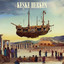

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Spotify API anahtarlarınızı buraya ekleyin   4HHQquxPkx4EUjMHOAYIiM    - 6eMEYyNV8WEdeMTT8ymHv0  - 0XNX9BCSWvEwsdBwUTRhMh
client_id = 'bc6f5a71013f4155a0874aebe0100635'
client_secret = '98a1134230354a64ac77120d3572a6bb'

# API kimlik doğrulaması
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Veri setini oluşturma
#playlist_id_dataset = input("Lütfen Spotify veri seti için çalma listesi ID'sini girin: ")
playlist_id_dataset = '4HHQquxPkx4EUjMHOAYIiM'
dataset_playlist = sp.playlist(playlist_id_dataset)
dataset_tracks = dataset_playlist["tracks"]["items"]
dataset_ids = []
dataset_names = []
dataset_artists = []
dataset_images = []
for track in dataset_tracks:
    if track["track"]:
        dataset_ids.append(track["track"]["id"])
        dataset_names.append(track["track"]["name"])
        artist = track["track"]["artists"][0]["name"]
        dataset_artists.append(artist)
        image = track["track"]["album"]["images"][0]["url"]
        dataset_images.append(image)
dataset_features = []
for i in range(0, len(dataset_ids), 50):
    audio_features = sp.audio_features(dataset_ids[i:i+50])
    for track in audio_features:
        dataset_features.append(track)
dataset_df = pd.DataFrame(dataset_features)
dataset_df["name"] = dataset_names
dataset_df["artist"] = dataset_artists
dataset_df["image"] = dataset_images
dataset_df = dataset_df.drop(['analysis_url', 'track_href', 'type', 'uri', 'id'], axis=1)
dataset_df = dataset_df[['name', 'artist', 'image', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
dataset_df.to_csv('spotify_dataset.csv', index=False)

# Kullanıcının dinlediği şarkıyı öğrenme
song_link = input("Lütfen kullanıcının dinlediği şarkının Spotify linkini girin: ")
song_id = song_link.split('/')[-1].split('?')[0]
song_info = sp.track(song_id)
user_ids = [song_info["id"]]
user_names = [song_info["name"]]
user_artists = [song_info["artists"][0]["name"]]
user_features = sp.audio_features(user_ids)
user_df = pd.DataFrame(user_features)
user_df["name"] = user_names
user_df["artist"] = user_artists
user_df = user_df.drop(['analysis_url', 'track_href', 'type', 'uri', 'id'], axis=1)
user_df = user_df[['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]


# Kullanıcının dinlediği şarkı sayısını gösterme
print("Kullanıcının dinlediği toplam şarkı sayısı:", len(user_df))

# Spotify veri setini yükleme
dataset_df = pd.read_csv('spotify_dataset.csv')
print('Veri setindeki toplam şarkı sayısı:', len(dataset_df))
print()  # boş bir satır ekleme

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X = dataset_df.drop(['name', 'artist', 'image'], axis=1)
X = scaler.fit_transform(X)
user_X = user_df.drop(['name', 'artist'], axis=1)
user_X = scaler.transform(user_X)
print()  # boş bir satır ekleme

# Modeli oluşturma
model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(X)

# Kullanıcının dinlediği tüm şarkıların özelliklerini kullanarak öneri yapma
query = user_X


# En yakın şarkıları bulma
distances, indices = model.kneighbors(query)

# Öneri listesi oluşturma
recommendations = []
for i in indices[0]:
    song = dataset_df.iloc[i]
    recommendations.append((song['name'], song['artist'], song['image']))


# Öneri listesini daha görsel hale getirme
recommendations_with_images = []
for i, rec in enumerate(recommendations):
    # Şarkının kapak resmini alıp, öneri listesine ekleyin
    track_name = dataset_df.iloc[indices[0][i]]['name']
    track_artist = dataset_df.iloc[indices[0][i]]['artist']
    results = sp.search(q=track_name + ' ' + track_artist, type='track', limit=1)
    image_url = results['tracks']['items'][0]['album']['images'][2]['url']  # 300x300 boyutunda olan resmi alıyoruz
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    recommendations_with_images.append((rec, img))

# Öneri listesini gösterme
print("Öneri Listesi:")
for i, rec in enumerate(recommendations_with_images):
    print(str(i + 1) + ".", rec[0])
    display(rec[1])
    print()
